In [33]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import re
import json
import unicodedata
import numpy as np
import ast
warnings.filterwarnings('ignore')

sys.path.append(os.path.abspath('../src'))

In [6]:
from data_preparation_utils import load_data, drop_and_save_columns, clean_text, filter_rows_by_column_value

In [8]:
pd.set_option('display.max_columns', None)

# load/save data frame

In [33]:
#load raw data
df_raw = load_data(r"C:\Users\idosc\Documents\GitHub\french_resturants\data\raw\tripadvisor_european_restaurants.csv")

In [10]:
# Load processed data
df = load_data(r"G:\My Drive\french_resturants\data\processed\french_resturants_only.csv")

In [44]:
#save data frame
df.to_csv(r"G:\My Drive\french_resturants\data\processed\french_resturants_only.csv", index=False)

# raw data info

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083397 entries, 0 to 1083396
Data columns (total 42 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   restaurant_link                    1083397 non-null  object 
 1   restaurant_name                    1083396 non-null  object 
 2   original_location                  1083397 non-null  object 
 3   country                            1083397 non-null  object 
 4   region                             1033074 non-null  object 
 5   province                           742765 non-null   object 
 6   city                               682712 non-null   object 
 7   address                            1083397 non-null  object 
 8   latitude                           1067607 non-null  float64
 9   longitude                          1067607 non-null  float64
 10  claimed                            1081555 non-null  object 
 11  awards                  

In [11]:
df_raw.head()

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,claimed,awards,popularity_detailed,popularity_generic,top_tags,price_level,price_range,meals,cuisines,special_diets,features,vegetarian_friendly,vegan_options,gluten_free,original_open_hours,open_days_per_week,open_hours_per_week,working_shifts_per_week,avg_rating,total_reviews_count,default_language,reviews_count_in_default_language,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,g10001637-d10002227,Le 147,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",45.961674,1.169131,Claimed,NaN,#1 of 2 Restaurants in Saint-Jouvent,#1 of 2 places to eat in Saint-Jouvent,"Cheap Eats, French",€,NaN,"Lunch, Dinner",French,NaN,"Reservations, Seating, Wheelchair Accessible, ...",N,N,N,NaN,NaN,NaN,NaN,4.0,36.0,English,2.0,2.0,0.0,0.0,0.0,0.0,4.0,4.5,4.0,NaN,NaN
1,g10001637-d14975787,Le Saint Jouvent,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",45.957040,1.205480,Unclaimed,NaN,#2 of 2 Restaurants in Saint-Jouvent,#2 of 2 places to eat in Saint-Jouvent,Cheap Eats,€,NaN,NaN,NaN,NaN,NaN,N,N,N,NaN,NaN,NaN,NaN,4.0,5.0,All languages,5.0,2.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,g10002858-d4586832,Au Bout du Pont,"[""Europe"", ""France"", ""Centre-Val de Loire"", ""B...",France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",46.635895,1.386133,Claimed,NaN,#1 of 1 Restaurant in Rivarennes,#1 of 1 places to eat in Rivarennes,"Cheap Eats, French, European",€,NaN,"Dinner, Lunch, Drinks","French, European",NaN,"Reservations, Seating, Table Service, Wheelcha...",N,N,N,NaN,NaN,NaN,NaN,5.0,13.0,English,4.0,3.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,g10002986-d3510044,Le Relais de Naiade,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Co...",France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",45.642610,1.824460,Claimed,NaN,#1 of 1 Restaurant in Lacelle,#1 of 1 places to eat in Lacelle,"Cheap Eats, French",€,NaN,"Lunch, Dinner",French,NaN,"Reservations, Seating, Serves Alcohol, Table S...",N,N,N,NaN,NaN,NaN,NaN,4.0,34.0,English,1.0,1.0,0.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN
4,g10022428-d9767191,Relais Du MontSeigne,"[""Europe"", ""France"", ""Occitanie"", ""Aveyron"", ""...",France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",44.208860,2.960470,Unclaimed,NaN,#1 of 1 Restaurant in Saint-Laurent-de-Levezou,#1 of 1 places to eat in Saint-Laurent-de-Levezou,"Mid-range, French",€€-€€€,NaN,"Lunch, Dinner",French,NaN,"Reservations, Seating, Wheelchair Accessible, ...",N,N,N,NaN,NaN,NaN,NaN,4.5,11.0,All languages,11.0,4.0,7.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN


# Processed data info

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155288 entries, 0 to 155287
Columns: 258 entries, restaurant_link to award_count
dtypes: float64(5), object(253)
memory usage: 305.7+ MB


In [14]:
df.head()

,original_location,region,province,city,claimed,awards,popularity_detailed,popularity_generic,top_tags,price_level,price_range,meals,cuisines,special_diets,features,vegetarian_friendly,vegan_options,gluten_free,original_open_hours,open_days_per_week,open_hours_per_week,working_shifts_per_week,default_language,accepts american express,accepts credit cards,accepts discover,accepts mastercard,accepts visa,afghani,african,after hours,albanian,algerian,american,apulian,arabic,argentinian,armenian,asian,assyrian,australian,austrian,azerbaijani,bahamian,bakeries,balti,bangladeshi,bar,barbecue,basque,beach,beer restaurants,beijing cuisine,beijing specialties,belgian,brazilian,breakfast,brew pub,british,brunch,buffet,burmese,byob,cafe,cajun creole,calabrian,cambodian,campania,canadian,cantonese,caribbean,cash only,catalan,caucasian,central american,central asian,central european,central italian,cheap eats,chilean,chinese,colombian,contemporary,costa rican,croatian,cuban,czech,danish,deli,delivery,delivery only,dessert,digital payments,dine with a local chef,diner,dining bars,dinner,dog friendly,drinks,drive thru,dutch,eastern european,ecuadorean,egyptian,emilian,ethiopian,european,family style,fast food,fine dining,free off street parking,free wifi,french,fruit parlours,fujian,full bar,fusion,gastropub,georgian,german,gift cards available,gluten free options,greek,grill,guangxi,guatemalan,halal,hawaiian,healthy,highchairs available,hokkaido cuisine,hong kong,hubei,hunan,hungarian,imperial chinese,indian,indonesian,international,irish,israeli,italian,jamaican,japanese,japanese fusion,japanese sweets parlour,jazz bar,kaiseki,kappo,korean,kosher,kyoto cuisine,kyushu cuisine,latin,latvian,lazio,lebanese,ligurian,live music,lombard,lunch,malaysian,medicinal foods,mediterranean,mexican,mid range,middle eastern,mongolian,moroccan,native american,neapolitan,nepalese,new zealand,nigerian,non smoking restaurants,northeastern chinese,northern italian,northwestern chinese,norwegian,outdoor seating,pakistani,parking available,persian,peruvian,philippine,pizza,playgrounds,polish,polynesian,portuguese,private dining,pub,puerto rican,quick bites,reservations,romagna,romana,romanian,russian,salvadoran,sardinian,scandinavian,scottish,seafood,seating,serves alcohol,shandong,shanghai,sicilian,singaporean,slovenian,soups,south american,southern italian,southwestern,spanish,speciality food market,sports bars,sri lankan,steakhouse,street food,street parking,sushi,swedish,swiss,szechuan,table service,taiwanese,takeout,television,thai,tibetan,tunisian,turkish,tuscan,ukrainian,uzbek,valet parking,validated parking,vegan options,vegetarian friendly,venezuelan,vietnamese,waterfront,welsh,wheelchair accessible,wine and beer,wine bar,xinjiang,yunnan,zhejiang,successful,award_count,moved_location
0,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",nouvelle aquitaine,haute vienne,saint jouvent,claimed,NaN,#1 of 2 Restaurants in Saint-Jouvent,#1 of 2 places to eat in Saint-Jouvent,"cheap eats, french",€,NaN,"lunch, dinner",french,NaN,"reservations, seating, wheelchair accessible, ...",N,N,N,NaN,NaN,NaN,NaN,english,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,0 or unknown,N
1,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",nouvelle aquitaine,haute vienne,saint jouvent,unclaimed,NaN,#2 of 2 Restaurants in Saint-Jouvent,#2 of 2 places to eat in Saint-Jouvent,cheap eats,€,NaN,NaN,NaN,NaN,NaN,N,N,N,NaN,NaN,NaN,NaN,all languages,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,

# filter counrty

In [13]:
# Only keep rows where the 'country' column matches 'France'
df = filter_rows_by_column_value(df_raw, 'country', 'France', clean_func=clean_text)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155288 entries, 0 to 155287
Columns: 258 entries, restaurant_link to successful
dtypes: float64(5), object(253)
memory usage: 305.7+ MB


In [17]:
#drop country column (single value)
df, dropped_df = drop_and_save_columns(df, 'country')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155288 entries, 0 to 155287
Data columns (total 41 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   restaurant_link                    155288 non-null  object 
 1   restaurant_name                    155288 non-null  object 
 2   original_location                  155288 non-null  object 
 3   region                             155286 non-null  object 
 4   province                           136932 non-null  object 
 5   city                               155158 non-null  object 
 6   address                            155288 non-null  object 
 7   latitude                           153359 non-null  float64
 8   longitude                          153359 non-null  float64
 9   claimed                            155117 non-null  object 
 10  awards                             43250 non-null   object 
 11  popularity_detailed                144657 no

# clean text columns

In [19]:
#def columns to clean
columns_to_clean = [
    'region',
    'province',
    'city',
    'claimed',
    'awards',
    'top_tags',
    'meals',
    'cuisines',
    'special_diets',
    'features',
    'default_language'
]

#apply clean_text function to chosen columns
for col in columns_to_clean:
    df[col] = df[col].apply(clean_text)

In [23]:
df.head()

,restaurant_link,restaurant_name,original_location,region,province,city,address,latitude,longitude,claimed,awards,popularity_detailed,popularity_generic,top_tags,price_level,price_range,meals,cuisines,special_diets,features,vegetarian_friendly,vegan_options,gluten_free,original_open_hours,open_days_per_week,open_hours_per_week,working_shifts_per_week,avg_rating,total_reviews_count,default_language,reviews_count_in_default_language,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,g10001637-d10002227,Le 147,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",nouvelle aquitaine,haute vienne,saint jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",45.961674,1.169131,claimed,NaN,#1 of 2 Restaurants in Saint-Jouvent,#1 of 2 places to eat in Saint-Jouvent,"cheap eats, french",€,NaN,"lunch, dinner",french,NaN,"reservations, seating, wheelchair accessible, ...",N,N,N,NaN,NaN,NaN,NaN,4.0,36.0,english,2.0,2.0,0.0,0.0,0.0,0.0,4.0,4.5,4.0,NaN,NaN
1,g10001637-d14975787,Le Saint Jouvent,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",nouvelle aquitaine,haute vienne,saint jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",45.957040,1.205480,unclaimed,NaN,#2 of 2 Restaurants in Saint-Jouvent,#2 of 2 places to eat in Saint-Jouvent,cheap eats,€,NaN,NaN,NaN,NaN,NaN,N,N,N,NaN,NaN,NaN,NaN,4.0,5.0,all languages,5.0,2.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,g10002858-d4586832,Au Bout du Pont,"[""Europe"", ""France"", ""Centre-Val de Loire"", ""B...",centre val de loire,berry,rivarennes,"2 rue des Dames, 36800 Rivarennes France",46.635895,1.386133,claimed,NaN,#1 of 1 Restaurant in Rivarennes,#1 of 1 places to eat in Rivarennes,"cheap eats, french, european",€,NaN,"dinner, lunch, drinks","french, european",NaN,"reservations, seating, table service, wheelcha...",N,N,N,NaN,NaN,NaN,NaN,5.0,13.0,english,4.0,3.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,g10002986-d3510044,Le Relais de Naiade,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Co...",nouvelle aquitaine,correze,lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",45.642610,1.824460,claimed,NaN,#1 of 1 Restaurant in Lacelle,#1 of 1 places to eat in Lacelle,"cheap eats, french",€,NaN,"lunch, dinner",french,NaN,"reservations, seating, serves alcohol, table s...",N,N,N,NaN,NaN,NaN,NaN,4.0,34.0,english,1.0,1.0,0.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN
4,g10022428-d9767191,Relais Du MontSeigne,"[""Europe"", ""France"", ""Occitanie"", ""Aveyron"", ""...",occitanie,aveyron,saint laurent de levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",44.208860,2.960470,unclaimed,NaN,#1 of 1 Restaurant in Saint-Laurent-de-Levezou,#1 of 1 places to eat in Saint-Laurent-de-Levezou,"mid range, french",€€-€€€,NaN,"lunch, dinner",french,NaN,"reservations, seating, wheelchair accessible, ...",N,N,N,NaN,NaN,NaN,NaN,4.5,11.0,all languages,11.0,4.0,7.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN


# extract tags data to Y/N columns

In [25]:
#columns to convert to strings:
columns_to_convert = [
    'region',
    'province',
    'city',
    'awards',
    'top_tags',
    'meals',
    'cuisines',
    'special_diets',
    'features',
    'default_language',
    'keywords'
]

# Convert these columns to string type
df[columns_to_convert] = df[columns_to_convert].astype('string')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155288 entries, 0 to 155287
Data columns (total 41 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   restaurant_link                    155288 non-null  object 
 1   restaurant_name                    155288 non-null  object 
 2   original_location                  155288 non-null  object 
 3   region                             155286 non-null  string 
 4   province                           136932 non-null  string 
 5   city                               155158 non-null  string 
 6   address                            155288 non-null  object 
 7   latitude                           153359 non-null  float64
 8   longitude                          153359 non-null  float64
 9   claimed                            155117 non-null  object 
 10  awards                             43250 non-null   string 
 11  popularity_detailed                144657 no

In [27]:
# List of columns to extract tags from
columns_to_extract = ['top_tags', 'meals', 'cuisines', 'special_diets', 'features', 'keywords']

# Dictionary to store the count of unique tags per column
unique_tags_count = {}

for col in columns_to_extract:
    # Drop missing values and split each cell into a list of tags
    tags_series = df[col].dropna().str.split(',')
    
    # Flatten the list of lists and strip extra whitespace from each tag
    tags = [tag.strip() for sublist in tags_series for tag in sublist if tag.strip()]
    
    # Use a set to get unique tags and store the count in the dictionary
    unique_tags_count[col] = len(set(tags))

print(unique_tags_count)

{'top_tags': 176, 'meals': 6, 'cuisines': 155, 'special_diets': 5, 'features': 39, 'keywords': 4702}


In [29]:
# Define the columns to extract unique tags from
columns_to_extract = ['top_tags', 'meals', 'cuisines', 'special_diets', 'features']

# Set to store all unique tags across the specified columns
all_unique_tags = set()

# Iterate over each column to collect unique tags
for col in columns_to_extract:
    for entry in df[col].dropna():  # Ignore NaNs
        if isinstance(entry, str):
            all_unique_tags.update(entry.split(', '))  # Split and collect unique tags

# Convert the set to a sorted list
unique_tags_list = sorted(list(all_unique_tags))  # Ensure proper list conversion

print(len(unique_tags_list))
print()
print(unique_tags_list)

228

['accepts american express', 'accepts credit cards', 'accepts discover', 'accepts mastercard', 'accepts visa', 'afghani', 'african', 'after hours', 'albanian', 'algerian', 'american', 'apulian', 'arabic', 'argentinian', 'armenian', 'asian', 'assyrian', 'australian', 'austrian', 'azerbaijani', 'bahamian', 'bakeries', 'balti', 'bangladeshi', 'bar', 'barbecue', 'basque', 'beach', 'beer restaurants', 'beijing cuisine', 'beijing specialties', 'belgian', 'brazilian', 'breakfast', 'brew pub', 'british', 'brunch', 'buffet', 'burmese', 'byob', 'cafe', 'cajun  creole', 'calabrian', 'cambodian', 'campania', 'canadian', 'cantonese', 'caribbean', 'cash only', 'catalan', 'caucasian', 'central american', 'central asian', 'central european', 'central italian', 'cheap eats', 'chilean', 'chinese', 'colombian', 'contemporary', 'costa rican', 'croatian', 'cuban', 'czech', 'danish', 'deli', 'delivery', 'delivery only', 'dessert', 'digital payments', 'dine with a local chef', 'diner', 'dining bars', 'd

In [31]:
#Create a column for each tag in unique_tags_list
for tag in unique_tags_list:
    df[tag] = df[columns_to_extract].apply(
        lambda row: "Y" if any(isinstance(entry, str) and tag in entry.split(', ') for entry in row) else "N",
        axis=1
    )

In [32]:
df.head()

,restaurant_link,restaurant_name,original_location,region,province,city,address,latitude,longitude,claimed,awards,popularity_detailed,popularity_generic,top_tags,price_level,price_range,meals,cuisines,special_diets,features,vegetarian_friendly,vegan_options,gluten_free,original_open_hours,open_days_per_week,open_hours_per_week,working_shifts_per_week,avg_rating,total_reviews_count,default_language,reviews_count_in_default_language,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords,accepts american express,accepts credit cards,accepts discover,accepts mastercard,accepts visa,afghani,african,after hours,albanian,algerian,american,apulian,arabic,argentinian,armenian,asian,assyrian,australian,austrian,azerbaijani,bahamian,bakeries,balti,bangladeshi,bar,barbecue,basque,beach,beer restaurants,beijing cuisine,beijing specialties,belgian,brazilian,breakfast,brew pub,british,brunch,buffet,burmese,byob,cafe,cajun creole,calabrian,cambodian,campania,canadian,cantonese,caribbean,cash only,catalan,caucasian,central american,central asian,central european,central italian,cheap eats,chilean,chinese,colombian,contemporary,costa rican,croatian,cuban,czech,danish,deli,delivery,delivery only,dessert,digital payments,dine with a local chef,diner,dining bars,dinner,dog friendly,drinks,drive thru,dutch,eastern european,ecuadorean,egyptian,emilian,ethiopian,european,family style,fast food,fine dining,free off street parking,free wifi,french,fruit parlours,fujian,full bar,fusion,gastropub,georgian,german,gift cards available,gluten free options,greek,grill,guangxi,guatemalan,halal,hawaiian,healthy,highchairs available,hokkaido cuisine,hong kong,hubei,hunan,hungarian,imperial chinese,indian,indonesian,international,irish,israeli,italian,jamaican,japanese,japanese fusion,japanese sweets parlour,jazz bar,kaiseki,kappo,korean,kosher,kyoto cuisine,kyushu cuisine,latin,latvian,lazio,lebanese,ligurian,live music,lombard,lunch,malaysian,medicinal foods,mediterranean,mexican,mid range,middle eastern,mongolian,moroccan,native american,neapolitan,nepalese,new zealand,nigerian,non smoking restaurants,northeastern chinese,northern italian,northwestern chinese,norwegian,outdoor seating,pakistani,parking available,persian,peruvian,philippine,pizza,playgrounds,polish,polynesian,portuguese,private dining,pub,puerto rican,quick bites,reservations,romagna,romana,romanian,russian,salvadoran,sardinian,scandinavian,scottish,seafood,seating,serves alcohol,shandong,shanghai,sicilian,singaporean,slovenian,soups,south american,southern italian,southwestern,spanish,speciality food market,sports bars,sri lankan,steakhouse,street food,street parking,sushi,swedish,swiss,szechuan,table service,taiwanese,takeout,television,thai,tibetan,tunisian,turkish,tuscan,ukrainian,uzbek,valet parking,validated parking,vegan options,vegetarian friendly,venezuelan,vietnamese,waterfront,welsh,wheelchair accessible,wine and beer,wine bar,xinjiang,yunnan,zhejiang
0,g10001637-d10002227,Le 147,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",nouvelle aquitaine,haute vienne,saint jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",45.961674,1.169131,claimed,<NA>,#1 of 2 Restaurants in Saint-Jouvent,#1 of 2 places to eat in Saint-Jouvent,"cheap eats, french",€,NaN,"lunch, dinner",french,<NA>,"reservations, seating, wheelchair accessible, ...",N,N,N,NaN,NaN,NaN,NaN,4.0,36.0,english,2.0,2.0,0.0,0.0,0.0,0.0,4.0,4.5,4.0,NaN,<NA>,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N
1,g10001637-d14975787,Le Saint Jouvent,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", "

# create target column

## find the correct values for nummber of reviews and average rating

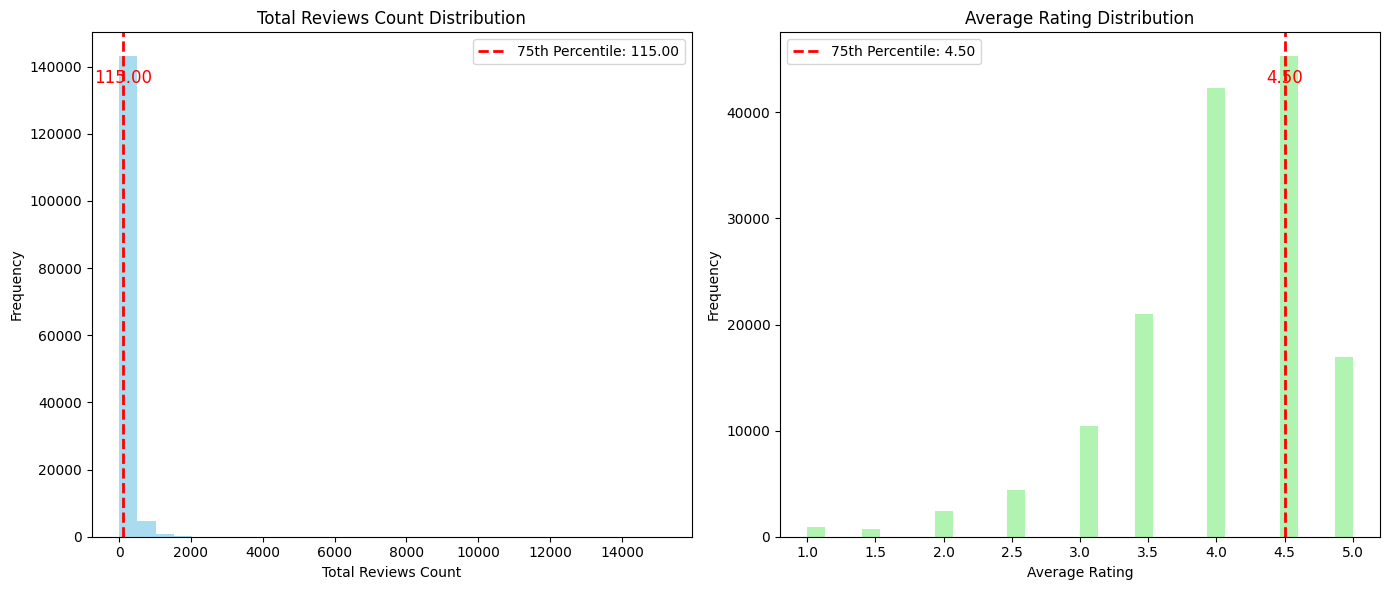

In [35]:
# Define the percentile to display, e.g., 75th percentile
percentile = 0.75

# Compute the thresholds
threshold_reviews = df['total_reviews_count'].quantile(percentile)
threshold_rating = df['avg_rating'].quantile(percentile)

# Create subplots for each column
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for total_reviews_count
axes[0].hist(df['total_reviews_count'].dropna(), bins=30, color='skyblue', alpha=0.7)
axes[0].axvline(threshold_reviews, color='red', linestyle='dashed', linewidth=2, 
                label=f'75th Percentile: {threshold_reviews:.2f}')
axes[0].set_title('Total Reviews Count Distribution')
axes[0].set_xlabel('Total Reviews Count')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Annotate the threshold value on the histogram for total_reviews_count
ymax0 = axes[0].get_ylim()[1]
axes[0].text(threshold_reviews, ymax0 * 0.9, f'{threshold_reviews:.2f}', 
             color='red', fontsize=12, ha='center')

# Plot for avg_rating
axes[1].hist(df['avg_rating'].dropna(), bins=30, color='lightgreen', alpha=0.7)
axes[1].axvline(threshold_rating, color='red', linestyle='dashed', linewidth=2, 
                label=f'75th Percentile: {threshold_rating:.2f}')
axes[1].set_title('Average Rating Distribution')
axes[1].set_xlabel('Average Rating')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Annotate the threshold value on the histogram for avg_rating
ymax1 = axes[1].get_ylim()[1]
axes[1].text(threshold_rating, ymax1 * 0.9, f'{threshold_rating:.2f}', 
             color='red', fontsize=12, ha='center')

plt.tight_layout()
plt.show()

## creating target cloumn

In [40]:
# Create the 'successful' column: "Y" if both conditions are met, "N" otherwise
df['successful'] = np.where(
    (df['avg_rating'] >= 4.5) & (df['total_reviews_count'] >= 115),
    "Y",
    "N"
)

# Optional: Check the distribution of the successful column
print(df['successful'].value_counts())

successful
N    140117
Y     15171
Name: count, dtype: int64


### removing reviews columns

In [43]:
# Columns that rely on reviews are data that will not be available at prediction time for a new resturant, and may cause data leakage.
# Columns are saved in the dropped column file.
# The columns can be used later to create a more robust success criteria column for more accurate prediction.

# Define the list of columns to drop
columns_to_drop = [
    'avg_rating',
    'total_reviews_count',
    'reviews_count_in_default_language',
    'excellent',
    'very_good',
    'average',
    'poor',
    'terrible',
    'food',
    'service',
    'value',
    'atmosphere'
]

# Drop the columns and save the dropped columns DataFrame
df, dropped_df = drop_and_save_columns(df, columns_to_drop)

df.head()

,restaurant_link,restaurant_name,original_location,region,province,city,address,latitude,longitude,claimed,awards,popularity_detailed,popularity_generic,top_tags,price_level,price_range,meals,cuisines,special_diets,features,vegetarian_friendly,vegan_options,gluten_free,original_open_hours,open_days_per_week,open_hours_per_week,working_shifts_per_week,default_language,keywords,accepts american express,accepts credit cards,accepts discover,accepts mastercard,accepts visa,afghani,african,after hours,albanian,algerian,american,apulian,arabic,argentinian,armenian,asian,assyrian,australian,austrian,azerbaijani,bahamian,bakeries,balti,bangladeshi,bar,barbecue,basque,beach,beer restaurants,beijing cuisine,beijing specialties,belgian,brazilian,breakfast,brew pub,british,brunch,buffet,burmese,byob,cafe,cajun creole,calabrian,cambodian,campania,canadian,cantonese,caribbean,cash only,catalan,caucasian,central american,central asian,central european,central italian,cheap eats,chilean,chinese,colombian,contemporary,costa rican,croatian,cuban,czech,danish,deli,delivery,delivery only,dessert,digital payments,dine with a local chef,diner,dining bars,dinner,dog friendly,drinks,drive thru,dutch,eastern european,ecuadorean,egyptian,emilian,ethiopian,european,family style,fast food,fine dining,free off street parking,free wifi,french,fruit parlours,fujian,full bar,fusion,gastropub,georgian,german,gift cards available,gluten free options,greek,grill,guangxi,guatemalan,halal,hawaiian,healthy,highchairs available,hokkaido cuisine,hong kong,hubei,hunan,hungarian,imperial chinese,indian,indonesian,international,irish,israeli,italian,jamaican,japanese,japanese fusion,japanese sweets parlour,jazz bar,kaiseki,kappo,korean,kosher,kyoto cuisine,kyushu cuisine,latin,latvian,lazio,lebanese,ligurian,live music,lombard,lunch,malaysian,medicinal foods,mediterranean,mexican,mid range,middle eastern,mongolian,moroccan,native american,neapolitan,nepalese,new zealand,nigerian,non smoking restaurants,northeastern chinese,northern italian,northwestern chinese,norwegian,outdoor seating,pakistani,parking available,persian,peruvian,philippine,pizza,playgrounds,polish,polynesian,portuguese,private dining,pub,puerto rican,quick bites,reservations,romagna,romana,romanian,russian,salvadoran,sardinian,scandinavian,scottish,seafood,seating,serves alcohol,shandong,shanghai,sicilian,singaporean,slovenian,soups,south american,southern italian,southwestern,spanish,speciality food market,sports bars,sri lankan,steakhouse,street food,street parking,sushi,swedish,swiss,szechuan,table service,taiwanese,takeout,television,thai,tibetan,tunisian,turkish,tuscan,ukrainian,uzbek,valet parking,validated parking,vegan options,vegetarian friendly,venezuelan,vietnamese,waterfront,welsh,wheelchair accessible,wine and beer,wine bar,xinjiang,yunnan,zhejiang,successful
0,g10001637-d10002227,Le 147,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",nouvelle aquitaine,haute vienne,saint jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",45.961674,1.169131,claimed,<NA>,#1 of 2 Restaurants in Saint-Jouvent,#1 of 2 places to eat in Saint-Jouvent,"cheap eats, french",€,NaN,"lunch, dinner",french,<NA>,"reservations, seating, wheelchair accessible, ...",N,N,N,NaN,NaN,NaN,NaN,english,<NA>,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N
1,g10001637-d14975787,Le Saint Jouvent,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",nouvelle aquitaine,haute vienne,saint jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",45.957040,1.205480,unclaimed,<NA>,#2 of 2 Restaurants in Saint-Jouve

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155288 entries, 0 to 155287
Columns: 258 entries, restaurant_link to successful
dtypes: float64(5), object(242), string(11)
memory usage: 306.9+ MB


In [20]:
#save data frame
df.to_csv(r"C:\Users\idosc\Documents\GitHub\french_resturants\data\processed\french_resturants_only.csv", index=False)

# Extracting number of awards

In [12]:
df['awards'].unique()

array([nan, 'travellers choice, certificate of excellence',
       'travellers choice, certificate of excellence , certificate of excellence , certificate of excellence , certificate of excellence',
       'travellers choice, certificate of excellence , certificate of excellence , certificate of excellence , certificate of excellence , certificate of excellence , certificate of excellence',
       'certificate of excellence , certificate of excellence',
       'certificate of excellence',
       'travellers choice, certificate of excellence , certificate of excellence , certificate of excellence , certificate of excellence , certificate of excellence',
       'certificate of excellence , certificate of excellence , certificate of excellence',
       'travellers choice, certificate of excellence , certificate of excellence , certificate of excellence',
       'travellers choice, certificate of excellence , certificate of excellence , certificate of excellence , certificate of excellence

In [14]:
# Create a new column 'award_count' that counts the number of awards per row,
# but if the value is null or empty, it returns "0 or unknown"
df['award_count'] = df['awards'].apply(
    lambda x: len([award.strip() for award in x.split(',')]) if pd.notnull(x) and x != "" else "0 or unknown"
)

df['award_count'].head(30)

0     0 or unknown
1     0 or unknown
2     0 or unknown
3     0 or unknown
4     0 or unknown
5                2
6     0 or unknown
7                5
8     0 or unknown
9                7
10    0 or unknown
11    0 or unknown
12    0 or unknown
13    0 or unknown
14    0 or unknown
15    0 or unknown
16    0 or unknown
17               7
18               2
19               2
20               5
21               1
22    0 or unknown
23    0 or unknown
24    0 or unknown
25    0 or unknown
26               6
27               3
28    0 or unknown
29    0 or unknown
Name: award_count, dtype: object

# Filling nulls in city

In [20]:
#how many nulls city and address columns have
null_count1 = df['city'].isnull().sum()
null_count2 = df['address'].isnull().sum()

print(f"null in city column: {null_count1}")
print(f"null in adress column: {null_count2}")

null in city column: 127
null in adress column: 0


In [22]:
#how many unique values adress have
df['address'].nunique()

143733

In [ ]:
def extract_city(address):
     """
     Extracts the city from an address string.
     Assumes the address format is:
     '... , <postal code> <City Name> France'
     """
     if pd.isnull(address):
         return None
     # Split on comma; assume the second part contains postal code, city, and country
     parts = address.split(',')
     if len(parts) < 2:
         return None
     # Get the second part and split by whitespace
     second_part = parts[1].strip()  # e.g., "87510 Saint-Jouvent France"
     words = second_part.split()
     # Check if we have enough parts: postal code, city, and country
     if len(words) < 3:
         return None
     # The city is assumed to be all words between the postal code (first word) and the country (last word)
     city_words = words[1:-1]
     city = ' '.join(city_words)
     # Remove any special characters (like hyphens) and convert to lowercase
     city_clean = re.sub(r'[^a-zA-Z\s]', '', city).lower()
     return city_clean

In [ ]:
# Fill missing city values by extracting from the address column
df['city'] = df.apply(lambda row: extract_city(row['address']) if pd.isnull(row['city']) else row['city'], axis=1)

# removing keyword column (very high missing values and low correlation)

In [12]:
df = df.drop('keywords', axis=1)

In [18]:
df.head()

,restaurant_link,restaurant_name,original_location,region,province,city,address,latitude,longitude,claimed,awards,popularity_detailed,popularity_generic,top_tags,price_level,price_range,meals,cuisines,special_diets,features,vegetarian_friendly,vegan_options,gluten_free,original_open_hours,open_days_per_week,open_hours_per_week,working_shifts_per_week,default_language,accepts american express,accepts credit cards,accepts discover,accepts mastercard,accepts visa,afghani,african,after hours,albanian,algerian,american,apulian,arabic,argentinian,armenian,asian,assyrian,australian,austrian,azerbaijani,bahamian,bakeries,balti,bangladeshi,bar,barbecue,basque,beach,beer restaurants,beijing cuisine,beijing specialties,belgian,brazilian,breakfast,brew pub,british,brunch,buffet,burmese,byob,cafe,cajun creole,calabrian,cambodian,campania,canadian,cantonese,caribbean,cash only,catalan,caucasian,central american,central asian,central european,central italian,cheap eats,chilean,chinese,colombian,contemporary,costa rican,croatian,cuban,czech,danish,deli,delivery,delivery only,dessert,digital payments,dine with a local chef,diner,dining bars,dinner,dog friendly,drinks,drive thru,dutch,eastern european,ecuadorean,egyptian,emilian,ethiopian,european,family style,fast food,fine dining,free off street parking,free wifi,french,fruit parlours,fujian,full bar,fusion,gastropub,georgian,german,gift cards available,gluten free options,greek,grill,guangxi,guatemalan,halal,hawaiian,healthy,highchairs available,hokkaido cuisine,hong kong,hubei,hunan,hungarian,imperial chinese,indian,indonesian,international,irish,israeli,italian,jamaican,japanese,japanese fusion,japanese sweets parlour,jazz bar,kaiseki,kappo,korean,kosher,kyoto cuisine,kyushu cuisine,latin,latvian,lazio,lebanese,ligurian,live music,lombard,lunch,malaysian,medicinal foods,mediterranean,mexican,mid range,middle eastern,mongolian,moroccan,native american,neapolitan,nepalese,new zealand,nigerian,non smoking restaurants,northeastern chinese,northern italian,northwestern chinese,norwegian,outdoor seating,pakistani,parking available,persian,peruvian,philippine,pizza,playgrounds,polish,polynesian,portuguese,private dining,pub,puerto rican,quick bites,reservations,romagna,romana,romanian,russian,salvadoran,sardinian,scandinavian,scottish,seafood,seating,serves alcohol,shandong,shanghai,sicilian,singaporean,slovenian,soups,south american,southern italian,southwestern,spanish,speciality food market,sports bars,sri lankan,steakhouse,street food,street parking,sushi,swedish,swiss,szechuan,table service,taiwanese,takeout,television,thai,tibetan,tunisian,turkish,tuscan,ukrainian,uzbek,valet parking,validated parking,vegan options,vegetarian friendly,venezuelan,vietnamese,waterfront,welsh,wheelchair accessible,wine and beer,wine bar,xinjiang,yunnan,zhejiang,successful,award_count
0,g10001637-d10002227,Le 147,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",nouvelle aquitaine,haute vienne,saint jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",45.961674,1.169131,claimed,NaN,#1 of 2 Restaurants in Saint-Jouvent,#1 of 2 places to eat in Saint-Jouvent,"cheap eats, french",€,NaN,"lunch, dinner",french,NaN,"reservations, seating, wheelchair accessible, ...",N,N,N,NaN,NaN,NaN,NaN,english,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,0 or unknown
1,g10001637-d14975787,Le Saint Jouvent,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",nouvelle aquitaine,haute vienne,saint jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",45.957040,1.205480,unclaimed,NaN,#2 of 2 Restaurants in Sai

# removing uneccessary columns

In [25]:
df, dropped_df = drop_and_save_columns(df, ['restaurant_link', 'restaurant_name', 'address', 'latitude', 'longitude'])

In [27]:
df.head()

,original_location,region,province,city,claimed,awards,popularity_detailed,popularity_generic,top_tags,price_level,price_range,meals,cuisines,special_diets,features,vegetarian_friendly,vegan_options,gluten_free,original_open_hours,open_days_per_week,open_hours_per_week,working_shifts_per_week,default_language,accepts american express,accepts credit cards,accepts discover,accepts mastercard,accepts visa,afghani,african,after hours,albanian,algerian,american,apulian,arabic,argentinian,armenian,asian,assyrian,australian,austrian,azerbaijani,bahamian,bakeries,balti,bangladeshi,bar,barbecue,basque,beach,beer restaurants,beijing cuisine,beijing specialties,belgian,brazilian,breakfast,brew pub,british,brunch,buffet,burmese,byob,cafe,cajun creole,calabrian,cambodian,campania,canadian,cantonese,caribbean,cash only,catalan,caucasian,central american,central asian,central european,central italian,cheap eats,chilean,chinese,colombian,contemporary,costa rican,croatian,cuban,czech,danish,deli,delivery,delivery only,dessert,digital payments,dine with a local chef,diner,dining bars,dinner,dog friendly,drinks,drive thru,dutch,eastern european,ecuadorean,egyptian,emilian,ethiopian,european,family style,fast food,fine dining,free off street parking,free wifi,french,fruit parlours,fujian,full bar,fusion,gastropub,georgian,german,gift cards available,gluten free options,greek,grill,guangxi,guatemalan,halal,hawaiian,healthy,highchairs available,hokkaido cuisine,hong kong,hubei,hunan,hungarian,imperial chinese,indian,indonesian,international,irish,israeli,italian,jamaican,japanese,japanese fusion,japanese sweets parlour,jazz bar,kaiseki,kappo,korean,kosher,kyoto cuisine,kyushu cuisine,latin,latvian,lazio,lebanese,ligurian,live music,lombard,lunch,malaysian,medicinal foods,mediterranean,mexican,mid range,middle eastern,mongolian,moroccan,native american,neapolitan,nepalese,new zealand,nigerian,non smoking restaurants,northeastern chinese,northern italian,northwestern chinese,norwegian,outdoor seating,pakistani,parking available,persian,peruvian,philippine,pizza,playgrounds,polish,polynesian,portuguese,private dining,pub,puerto rican,quick bites,reservations,romagna,romana,romanian,russian,salvadoran,sardinian,scandinavian,scottish,seafood,seating,serves alcohol,shandong,shanghai,sicilian,singaporean,slovenian,soups,south american,southern italian,southwestern,spanish,speciality food market,sports bars,sri lankan,steakhouse,street food,street parking,sushi,swedish,swiss,szechuan,table service,taiwanese,takeout,television,thai,tibetan,tunisian,turkish,tuscan,ukrainian,uzbek,valet parking,validated parking,vegan options,vegetarian friendly,venezuelan,vietnamese,waterfront,welsh,wheelchair accessible,wine and beer,wine bar,xinjiang,yunnan,zhejiang,successful,award_count
0,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",nouvelle aquitaine,haute vienne,saint jouvent,claimed,NaN,#1 of 2 Restaurants in Saint-Jouvent,#1 of 2 places to eat in Saint-Jouvent,"cheap eats, french",€,NaN,"lunch, dinner",french,NaN,"reservations, seating, wheelchair accessible, ...",N,N,N,NaN,NaN,NaN,NaN,english,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,0 or unknown
1,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",nouvelle aquitaine,haute vienne,saint jouvent,unclaimed,NaN,#2 of 2 Restaurants in Saint-Jouvent,#2 of 2 places to eat in Saint-Jouvent,cheap eats,€,NaN,NaN,NaN,NaN,NaN,N,N,N,NaN,NaN,NaN,NaN,all languages,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N

# creating column named 'moved_location'

In [32]:
df['original_location'].unique()

array(['["Europe", "France", "Nouvelle-Aquitaine", "Haute-Vienne", "Saint-Jouvent"]',
       '["Europe", "France", "Centre-Val de Loire", "Berry", "Indre", "Rivarennes"]',
       '["Europe", "France", "Nouvelle-Aquitaine", "Correze", "Lacelle"]',
       ...,
       '["Europe", "France", "Grand Est", "Bas-Rhin", "Fessenheim-le-Bas"]',
       '["Europe", "France", "Ile-de-France", "Bonneuil-en-France"]',
       '["Europe", "France", "Ile-de-France", "Seine-et-Marne", "Thoury-Ferrottes"]'],
      shape=(15118,), dtype=object)

In [40]:
df['original_location'].nunique()

15118

In [38]:
null_count = df['original_location'].isnull().sum()
print(null_count)

0


In [80]:
# Function to normalize the text
def normalize(text):
    text = text.lower().replace("-", " ").strip()
    text = unicodedata.normalize("NFKD", text)
    text = text.encode("ASCII", "ignore").decode("utf-8")
    return text

# Function to compare city and last location after parsing
def compare_city(row):
    if pd.isnull(row["city"]):
        return None

    try:
        # Parse the string as a JSON array (list)
        location_list = json.loads(row["original_location"])
        last_place = location_list[-1]
    except:
        return None  # If parsing fails or list is bad

    # Compare normalized values
    return "N" if normalize(row["city"]) == normalize(last_place) else "Y"

# Apply the function to create 'moved_location'
df["moved_location"] = df.apply(compare_city, axis=1)

In [82]:
df['moved_location'].unique()

array(['N', 'Y', None], dtype=object)

# extracting open hours

In [16]:
def extract_hours(opening_dict):
    # Define the days of the week
    days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    result = {}

    # Handle nulls in the original data (i.e., NaN)
    if pd.isnull(opening_dict):
        # Fill all open/close fields with None
        for day in days:
            result[f'{day.lower()}_open_1st'] = None
            result[f'{day.lower()}_close_1st'] = None
            result[f'{day.lower()}_open_2nd'] = None
            result[f'{day.lower()}_close_2nd'] = None
        return result

    try:
        # Convert string representation of dict to actual Python dict
        opening_dict = ast.literal_eval(opening_dict)
    except Exception:
        # If conversion fails (bad format), fill with None just like with nulls
        for day in days:
            result[f'{day.lower()}_open_1st'] = None
            result[f'{day.lower()}_close_1st'] = None
            result[f'{day.lower()}_open_2nd'] = None
            result[f'{day.lower()}_close_2nd'] = None
        return result

    # Go through each day and extract the opening hours
    for day in days:
        periods = opening_dict.get(day)  # Get list of time ranges for the day

        if not periods:
            # If the day is missing or has no entries, set everything to None
            result[f'{day.lower()}_open_1st'] = None
            result[f'{day.lower()}_close_1st'] = None
            result[f'{day.lower()}_open_2nd'] = None
            result[f'{day.lower()}_close_2nd'] = None

        elif len(periods) == 1:
            # Only one shift during the day
            open1, close1 = periods[0].split('-')  # Split the time range
            result[f'{day.lower()}_open_1st'] = open1
            result[f'{day.lower()}_close_1st'] = close1
            # Set second shift as 'continuous'
            result[f'{day.lower()}_open_2nd'] = 'continuous'
            result[f'{day.lower()}_close_2nd'] = 'continuous'

        elif len(periods) == 2:
            # Two shifts during the day
            open1, close1 = periods[0].split('-')
            open2, close2 = periods[1].split('-')
            result[f'{day.lower()}_open_1st'] = open1
            result[f'{day.lower()}_close_1st'] = close1
            result[f'{day.lower()}_open_2nd'] = open2
            result[f'{day.lower()}_close_2nd'] = close2

        else:
            # More than 2 shifts — unsupported, fill with None
            result[f'{day.lower()}_open_1st'] = None
            result[f'{day.lower()}_close_1st'] = None
            result[f'{day.lower()}_open_2nd'] = None
            result[f'{day.lower()}_close_2nd'] = None

    return result  # Return the full row's worth of extracted times


# Apply the extract_hours function to the 'original_open_hours' column
# - `.apply(extract_hours)` applies the function to each row
# - `.apply(pd.Series)` turns each dictionary into columns
# - `pd.concat([...], axis=1)` joins these new columns back to your main dataframe
df = pd.concat(
    [df, df['original_open_hours'].apply(extract_hours).apply(pd.Series)],
    axis=1
)

In [18]:
df.head()

,original_location,region,province,city,claimed,awards,popularity_detailed,popularity_generic,top_tags,price_level,price_range,meals,cuisines,special_diets,features,vegetarian_friendly,vegan_options,gluten_free,original_open_hours,open_days_per_week,open_hours_per_week,working_shifts_per_week,default_language,accepts american express,accepts credit cards,accepts discover,accepts mastercard,accepts visa,afghani,african,after hours,albanian,algerian,american,apulian,arabic,argentinian,armenian,asian,assyrian,australian,austrian,azerbaijani,bahamian,bakeries,balti,bangladeshi,bar,barbecue,basque,beach,beer restaurants,beijing cuisine,beijing specialties,belgian,brazilian,breakfast,brew pub,british,brunch,buffet,burmese,byob,cafe,cajun creole,calabrian,cambodian,campania,canadian,cantonese,caribbean,cash only,catalan,caucasian,central american,central asian,central european,central italian,cheap eats,chilean,chinese,colombian,contemporary,costa rican,croatian,cuban,czech,danish,deli,delivery,delivery only,dessert,digital payments,dine with a local chef,diner,dining bars,dinner,dog friendly,drinks,drive thru,dutch,eastern european,ecuadorean,egyptian,emilian,ethiopian,european,family style,fast food,fine dining,free off street parking,free wifi,french,fruit parlours,fujian,full bar,fusion,gastropub,georgian,german,gift cards available,gluten free options,greek,grill,guangxi,guatemalan,halal,hawaiian,healthy,highchairs available,hokkaido cuisine,hong kong,hubei,hunan,hungarian,imperial chinese,indian,indonesian,international,irish,israeli,italian,jamaican,japanese,japanese fusion,japanese sweets parlour,jazz bar,kaiseki,kappo,korean,kosher,kyoto cuisine,kyushu cuisine,latin,latvian,lazio,lebanese,ligurian,live music,lombard,lunch,malaysian,medicinal foods,mediterranean,mexican,mid range,middle eastern,mongolian,moroccan,native american,neapolitan,nepalese,new zealand,nigerian,non smoking restaurants,northeastern chinese,northern italian,northwestern chinese,norwegian,outdoor seating,pakistani,parking available,persian,peruvian,philippine,pizza,playgrounds,polish,polynesian,portuguese,private dining,pub,puerto rican,quick bites,reservations,romagna,romana,romanian,russian,salvadoran,sardinian,scandinavian,scottish,seafood,seating,serves alcohol,shandong,shanghai,sicilian,singaporean,slovenian,soups,south american,southern italian,southwestern,spanish,speciality food market,sports bars,sri lankan,steakhouse,street food,street parking,sushi,swedish,swiss,szechuan,table service,taiwanese,takeout,television,thai,tibetan,tunisian,turkish,tuscan,ukrainian,uzbek,valet parking,validated parking,vegan options,vegetarian friendly,venezuelan,vietnamese,waterfront,welsh,wheelchair accessible,wine and beer,wine bar,xinjiang,yunnan,zhejiang,successful,award_count,moved_location,mon_open_1st,mon_close_1st,mon_open_2nd,mon_close_2nd,tue_open_1st,tue_close_1st,tue_open_2nd,tue_close_2nd,wed_open_1st,wed_close_1st,wed_open_2nd,wed_close_2nd,thu_open_1st,thu_close_1st,thu_open_2nd,thu_close_2nd,fri_open_1st,fri_close_1st,fri_open_2nd,fri_close_2nd,sat_open_1st,sat_close_1st,sat_open_2nd,sat_close_2nd,sun_open_1st,sun_close_1st,sun_open_2nd,sun_close_2nd
0,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",nouvelle aquitaine,haute vienne,saint jouvent,claimed,NaN,#1 of 2 Restaurants in Saint-Jouvent,#1 of 2 places to eat in Saint-Jouvent,"cheap eats, french",€,NaN,"lunch, dinner",french,NaN,"reservations, seating, wheelchair accessible, ...",N,N,N,NaN,NaN,NaN,NaN,english,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,0 or unknown,N,None,None,

# remove additional columns

In [25]:
df, dropped_df = drop_and_save_columns(df, ['original_location', 'original_open_hours'], save_path=r"G:\My Drive\french_resturants\data\processed\dropped_columns.csv")

# extracting popularity data

In [35]:
# Use a regular expression to extract both numbers
df[['rank', 'total_restaurants_in_city']] = df['popularity_detailed'].str.extract(r'#(\d+)\s+of\s+(\d+)')

# Convert the extracted values to integers
df['rank'] = df['rank'].astype(float)  # Use float in case of missing values
df['total_restaurants_in_city'] = df['total_restaurants_in_city'].astype(float)

In [37]:
df[['rank', 'total_restaurants_in_city']].head()

,rank,total_restaurants_in_city
0,1.0,2.0
1,2.0,2.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0


# drop popularity columns

In [42]:
df, dropped_df = drop_and_save_columns(df, ['popularity_detailed', 'popularity_generic'], save_path=r"G:\My Drive\french_resturants\data\processed\dropped_columns.csv")